<h1 align="center">Teoría Generalizada del Medio Efectivo de la Polarización Inducida: Inclusiones Esféricas</h1>
<div align="right">Por David A. Miranda, PhD<br>2021</div>
<h2>1. Importa las librerias</h2>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# 2. Detalles teóricos
La Teoría Generalizada del Medio Efectivo de la Polarización Inducida, GEMTIP, fue formulada por el profesor [Zhadanov en 2008](http://www.cemi.utah.edu/PDF_70_10/2008b.pdf).  En esta teória se modela las propiedades eléctricas de un medio heterogéneo por medio de uno homogéneo efectivo, de manera análoga a como un cuando de un circuito eléctrico complejo, constituido por muchos elementos, se obtiene el circuito equivalente.

Para el caso de inclusiones esféricas, la conductividad eléctrica efectiva $\sigma_e$ está dada por:

$$\sigma_e = \sigma_0 \left\{ 1 + \sum_{l=1}^N f_l M_l \left[ 1 - \frac{1}{1 + (j\omega\tau_l)^{c_l}} \right] \right\}$$

Donde $\sigma_0 = 1/\rho_0$ es la conductividad eléctrica del medio soporte; $f_l$, la fracción de volumen que ocupan las inclusiones $l$-ésimas; $M_l = 3 \frac{\rho_0 - \rho_l}{2\rho_l + \rho_0}$, la polarizabilidad de las inclusiones $l$-ésimas; $\rho_l = 1/\sigma_l$, la resistividad eléctrica de las inclusiones $l$-ésimas; $\omega$, la frecuencia angular de la perturbación externa; $\tau_l$, el tiempo de relajación de las inclusiones $l$-ésimas y $c_l$, el parámetro de relajación de las inclusiones $l$-ésimas.

# 3. El modelo
El siguiente método implementa el modelo GEMTIP para describir la conductividad eléctrica de inclusiones esféricas.

In [2]:
def gemtip_sh(params, w):
    params_keys = ['rho_0','rho_l', 'f_l', 'tau_l', 'c_l']
    sigma_e = np.array([])
    # Verificación de parámetros #
    if type(params) != type({}):
        print('Error! The params must be a dictionary.')
        return sigma_e
    this_keys = params.keys()
    for key in params_keys:
        if not key in this_keys:
            print('Error! The parameter %s information was omited in params.' % key)
            return sigma_e
    N = [ len(params[key]) for key in params_keys[1:] ]
    if np.std(N) != 0:
        print('Error in the number of parameters *_l, please, review.')
        return sigma_e
    rho_0 = params['rho_0']
    rho_l = np.array(params['rho_l'])
    f_l   = np.array(params['f_l'])
    tau_l = np.array(params['tau_l'])
    c_l   = np.array(params['c_l'])
    M_l   = 3 * (rho_0 - rho_l) / (2 * rho_l + rho_0)
    if np.sum(f_l) >= 1:
        print('Error! The sum of all f_l must be less than one.')
        return sigma_e
    #############################
    w = w.reshape(len(w), 1)
    sum_elements = 0
    for fl, Ml, Tl, cl in zip(f_l, M_l, tau_l, c_l):
        sum_elements += fl*Ml * (1 - 1 / ( 1 + (1j * w * Tl) ** cl ))
    sigma_e = (1 + sum_elements)/rho_0 
    return sigma_e

# 4. Ejemplo

In [3]:
f = np.logspace(-3, 7, 2000)
w = 2 * np.pi * f
params = {
    'rho_0' : 20,
    'rho_l' : [
        5,
        2,
        1,
    ],
    'f_l'   : [
        0.1,
        0.2,
        0.3,
    ],
    'tau_l' : [
        100,
        1e-2,
        1e-5,
    ],
    'c_l' : [
        0.8,
        0.7,
        0.9,
    ],
}

sigma_e = gemtip_sh(params, w)
rho_e = 1 / sigma_e

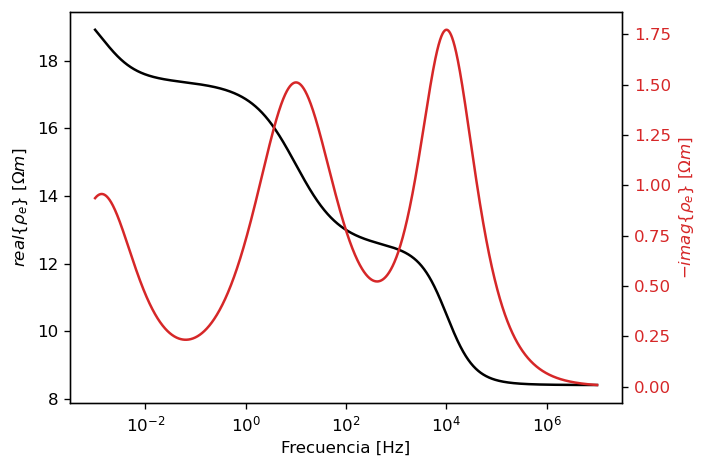

In [4]:
fig, ax1 = plt.subplots(dpi = 120)
color = 'k'
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel(r'$real\{\rho_e\}$ $[\Omega m]$', color=color)
ax1.semilogx(f, rho_e.real, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel(r'$-imag\{\rho_e\}$ $[\Omega m]$', color=color)  # we already handled the x-label with ax1
ax2.semilogx(f, -rho_e.imag, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

# 5. Pregunas de autoexplicación
Resuleva las siguientes preguntas de autoexplicación:
+ ¿Cuáles son los datos de entrada y salida del método gemtip_sh?
+ ¿Cómo se cálcula la conductividad eléctrica con el método gemtip_sh?
+ El método gemtip_sh tiene implementado un algoritmo para detectar errores (verificación de parámetros), explique cada uno de los errores que detecta el algoritmo y de un ejemplo para cada posible error.
+ ¿Cómo se relacionan los picos de la parte imaginaria de la resistividad efectiva $\rho_e$ y los tiempos de relajación $\tau_l$?
+ Reproduzca los espectros mostrados en el artículo de [Zhadanov 2008](http://www.cemi.utah.edu/PDF_70_10/2008b.pdf) para inclusiones esféricas.  
+ ¿Qué diferencias encontró en la definición de los parámetros al reproducir los espectros del artículo de [Zhadanov 2008](http://www.cemi.utah.edu/PDF_70_10/2008b.pdf)? 

End